## 14 Apr Random Forest - Ensemble technique 4

Build a random forest classifier to predict the risk of heart disease based on a dataset of patient 
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, 
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the data
df = pd.read_csv("Patient dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the  numerical features if necessary.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




### conclusion : 

    No Missing values 
    all are int and float

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## check the range of separate Values

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

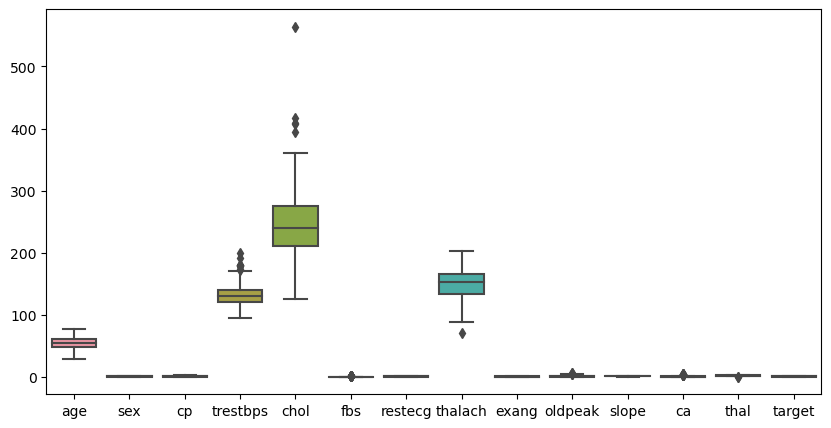

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(df)

In [8]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [9]:
df['chol'] = df['chol'].apply(lambda x : 275.0 if x>275.0 else x)

In [10]:
df['chol'].describe()

count    303.000000
mean     236.636964
std       34.987229
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      275.000000
Name: chol, dtype: float64

## Conclusion :

    No Missing Values
    No Categorical Features 
    Scaling is not Necessary

## Dependent and Independent data

In [11]:
X = df.loc[:,df.columns!='target']

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2
4,57,0,0,120,275.0,0,1,163,1,0.6,2,0,2


In [13]:
y = df['target']

### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.30)

In [16]:
X_train.count(), X_test.count()

(age         212
 sex         212
 cp          212
 trestbps    212
 chol        212
 fbs         212
 restecg     212
 thalach     212
 exang       212
 oldpeak     212
 slope       212
 ca          212
 thal        212
 dtype: int64,
 age         91
 sex         91
 cp          91
 trestbps    91
 chol        91
 fbs         91
 restecg     91
 thalach     91
 exang       91
 oldpeak     91
 slope       91
 ca          91
 thal        91
 dtype: int64)

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rand_cls = RandomForestClassifier(n_estimators=100, max_depth=10)

In [19]:
rand_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [20]:
y_pred = rand_cls.predict(X_test)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [22]:
accuracy_score(y_pred, y_test)

0.8461538461538461

In [23]:
precision_score(y_pred, y_test)

0.9038461538461539

In [24]:
recall_score(y_pred, y_test)

0.8392857142857143

In [25]:
f1_score(y_pred, y_test)

0.8703703703703703

In [26]:
confusion_matrix(y_pred, y_test)

array([[30,  5],
       [ 9, 47]])

### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [27]:
importances = rand_cls.feature_importances_

In [28]:
importances

array([0.11266904, 0.032998  , 0.14368418, 0.08147269, 0.05743943,
       0.00851026, 0.01651094, 0.11114176, 0.05752447, 0.11199164,
       0.05147514, 0.12003188, 0.09455059])

In [30]:
df_imp = pd.DataFrame({'lab' : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'],
                       'val' : importances})

<AxesSubplot: xlabel='lab', ylabel='val'>

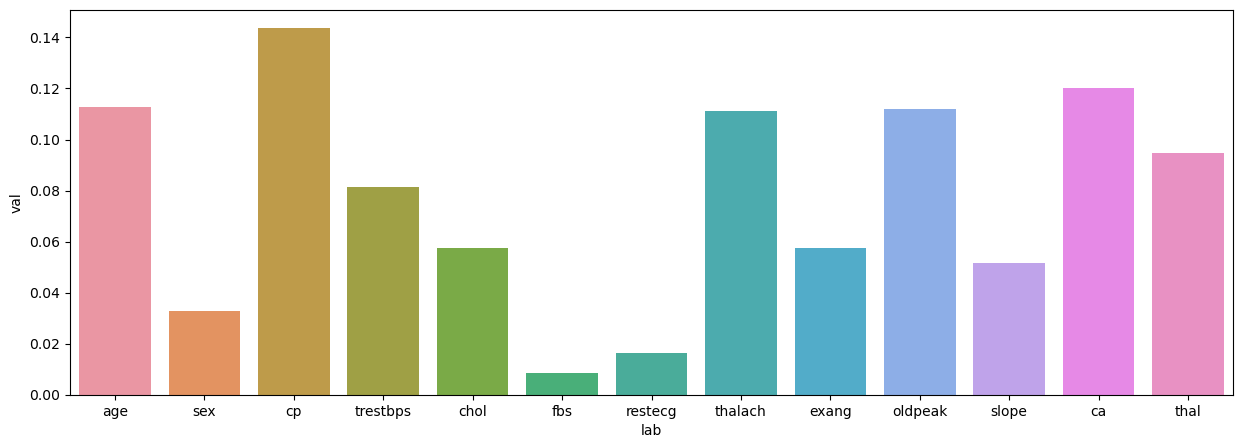

In [31]:
plt.figure(figsize = (15, 5))
sns.barplot(x='lab', y='val',data=df_imp)

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [32]:
Parameters = {'n_estimators' : [100,250,500, 1000,1500,2000],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_depth' : [10,20,40, 70, 100],
             }
              

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()

In [37]:
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(rf_cls,
                   param_distributions=Parameters,
                   scoring='accuracy',
                   cv = 5,
                   verbose = 3)

In [38]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=70, n_estimators=1500;, score=0.791 total time=   2.6s
[CV 2/5] END criterion=gini, max_depth=70, n_estimators=1500;, score=0.744 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=70, n_estimators=1500;, score=0.810 total time=   2.6s
[CV 4/5] END criterion=gini, max_depth=70, n_estimators=1500;, score=0.786 total time=   2.6s
[CV 5/5] END criterion=gini, max_depth=70, n_estimators=1500;, score=0.810 total time=   2.8s
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=250;, score=0.814 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=250;, score=0.767 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=250;, score=0.786 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=250;, score=0.786 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=250;, score=0.857 total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 40, 70, 100],
                                        'n_estimators': [100, 250, 500, 1000,
                                                         1500, 2000]},
                   scoring='accuracy', verbose=3)

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.|

In [39]:
cv.best_params_

{'n_estimators': 1000, 'max_depth': 20, 'criterion': 'gini'}

In [40]:
# these are our best parameters

In [41]:
y_pred_tuned = cv.predict(X_test)

In [42]:
## comparision 

accuracy_score(y_pred_tuned, y_test)

0.8461538461538461

In [43]:
confusion_matrix(y_pred_tuned, y_test)

array([[30,  5],
       [ 9, 47]])

#### Conclusion:

tuned Model is better

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [44]:
## most important Feature : 

<AxesSubplot: xlabel='lab', ylabel='val'>

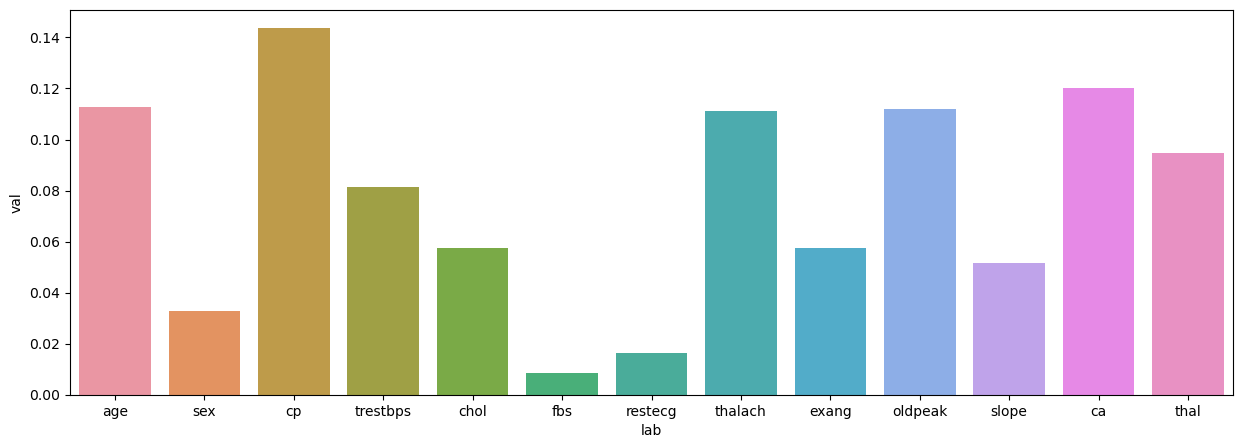

In [45]:
importances = rand_cls.feature_importances_
df_imp = pd.DataFrame({'lab' : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'],
                       'val' : importances})
plt.figure(figsize = (15, 5))
sns.barplot(x='lab', y='val',data=df_imp)

In [46]:
# important feature - cp, ca

In [47]:
df['cp'].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [48]:
df['ca'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [51]:
df_new = df[['cp', 'ca', 'target']]

In [52]:
df_new.head()

,cp,ca,target
0,3,0,1
1,2,0,1
2,1,0,1
3,1,0,1
4,0,0,1


Text(0, 0.5, 'CA')

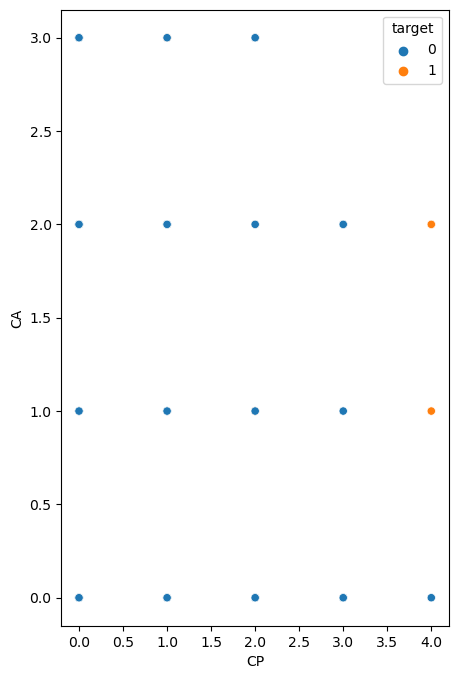

In [74]:
plt.figure(figsize = (5, 8))
sns.scatterplot(x ='ca', y = 'cp', hue = 'target', data = df)
#sns.scatterplot(x ='cp', y = 'ca', hue = 'target', data = df_new)
plt.xlabel('CP')
plt.ylabel('CA')

Colclusion : 
    
if CA >= 4 and CP >=1,2 then there should be a heart disease risk